In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from lib import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np

In [2]:
rec = Recommender(lam=0.01, gamma=0.01, tau=0.01)
rec.initialize_from_csv("ml-latest-small/movies.csv", "ml-latest-small/ratings.csv", train_test_split=True)
print(len(rec.users))
print(len(rec.movies))

Initialized
Parsed ml-latest-small/ratings.csv
Parsed ml-latest-small/movies.csv


Reformatting movie ratings: 100%|██████████| 9724/9724 [00:00<00:00, 112530.11it/s]

610
9724


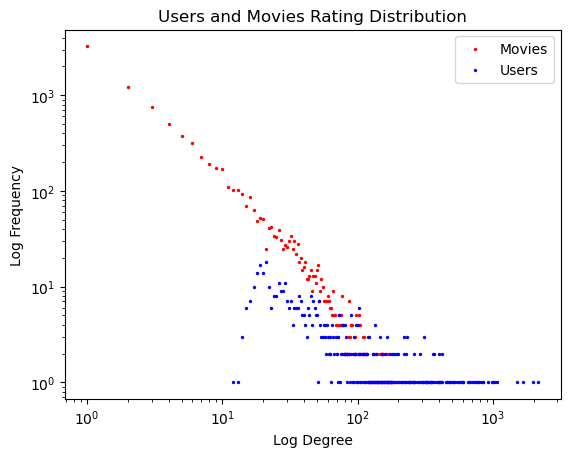

In [3]:
user_freq = {}
movie_freq = {}

#iterate over users
for user in rec.users:
    degree = len(user.ratings)
    if degree not in user_freq:
        user_freq[degree] = 1
    else:
        user_freq[degree] += 1

for movie in rec.movies:
    degree = len(movie.ratings)

    if degree not in movie_freq:
        movie_freq[degree] = 1
    else:
        movie_freq[degree] += 1

m_deg = [degree for degree in movie_freq.keys()]
m_freq = [freq for freq in movie_freq.values()]
plt.scatter(m_deg, m_freq, c='red', s=2, label='Movies')

u_deg = [degree for degree in user_freq.keys()]
u_freq = [freq for freq in user_freq.values()]
plt.scatter(u_deg, u_freq, c='blue', s=2, label='Users')
plt.xscale("log")
plt.yscale("log")


plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.legend()
plt.title("Users and Movies Rating Distribution")

plt.show()

In [9]:
statistics = rec.fit_biases_only(max_iter=10)

100%|██████████| 10/10 [00:02<00:00,  3.90it/s]


[5394.3825, 311.13774137008335, 301.5743114610411, 300.20474797802314, 299.3852930801498, 298.71840104122185, 298.1596974310627, 297.690145403915, 297.2953305985549, 296.9633280200564, 296.68413973889744]


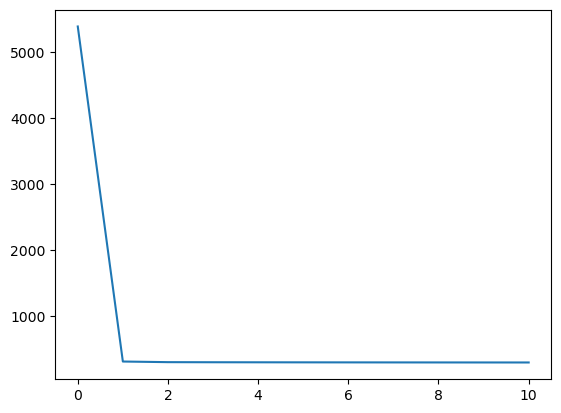

In [11]:
plt.plot(statistics['neg_log_liks'])
print(statistics['neg_log_liks'])

[3.654253368115561, 0.7555072685846566, 0.7473625440420398, 0.7471488310628757, 0.7475458775189385, 0.7481030109880641, 0.748714889832984, 0.7493203815575865, 0.7498845032101984, 0.7503904537325022, 0.7508328353073315]


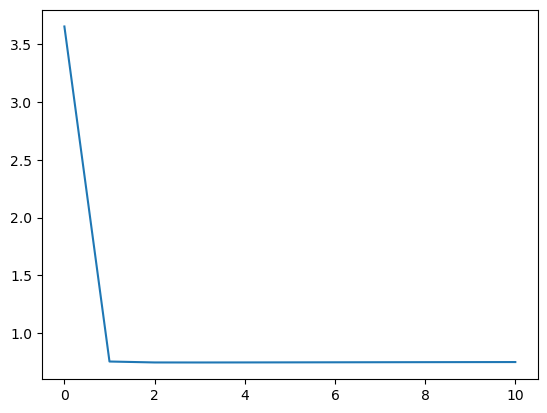

In [13]:
plt.plot(statistics['RMSEs_test'])
print(statistics['RMSEs_test'])

[1.0002581152208154, 1.0002581152208154, 2.353820049749096, 2.349981789105825, 2.336052392730228, 2.3279710048970075, 2.31501373384196, 2.300830911042651, 2.287188312322497, 2.2746103004033764, 2.263096166702058, 2.2525594472561665]


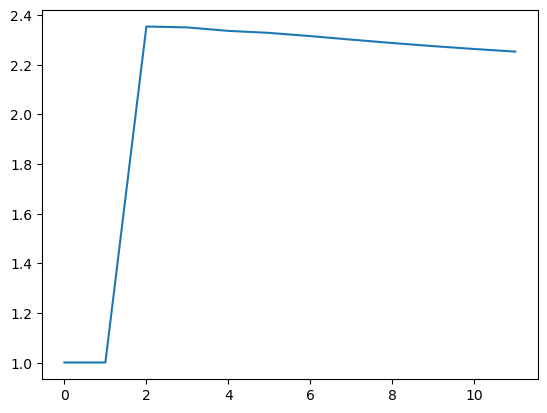

In [7]:
plt.plot(statistics['user_embed_length'])
print(statistics['user_embed_length'])

[0.9993240187981606, 0.9993240187981606, 1.1882046737337197, 1.489617307848181, 1.580128229191945, 1.634904015516358, 1.6819095732400533, 1.7256827972213797, 1.767296091714724, 1.8069054894252168, 1.8445529614372007, 1.8801912775338618]


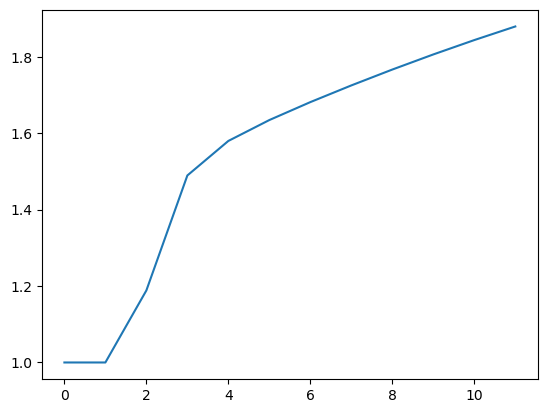

In [8]:
plt.plot(statistics['item_embed_length'])
print(statistics['item_embed_length'])

[0.0, 3.6138911859350697, 3.5475721895149244, 3.517560393144796, 3.4939451616980794, 3.471374965667036, 3.448999608343597, 3.4267392316517773, 3.4046165612455095, 3.3826526335602956, 3.360858366482715]


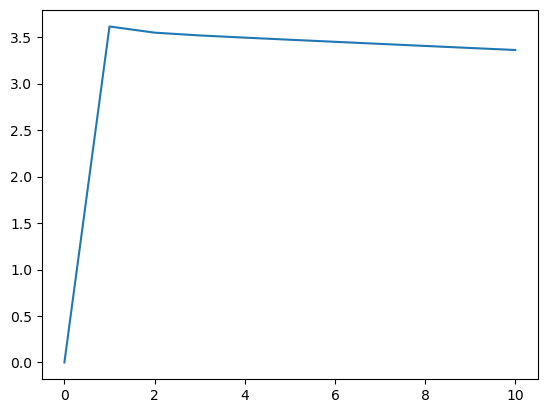

In [8]:
plt.plot(statistics['mean_user_bias'])
print(statistics['mean_user_bias'])

[0.0, -0.16645289371302582, -0.19392517335916346, -0.18653658127170125, -0.1702604241727999, -0.152230445743067, -0.13412229604016082, -0.11623320791167698, -0.09856937074521656, -0.08109863780358643, -0.06379669009576386]


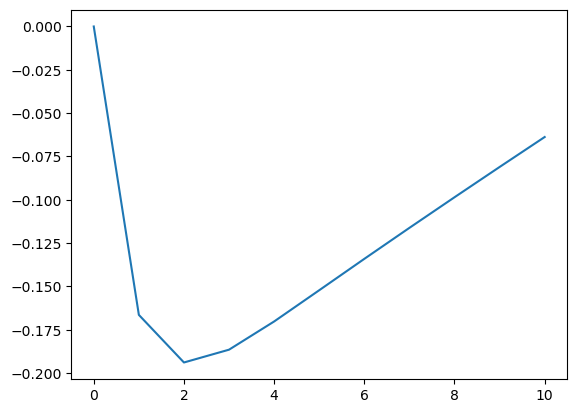

In [9]:
plt.plot(statistics['mean_item_bias'])
print(statistics['mean_item_bias'])